# EMG data processing

Installing and importing required libraries.

In [8]:
! pip3 install numpy
! pip3 install matplotlib
! pip3 install scipy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/85/64/5dbe0daf0beb14c3cd4b9a3493c5dc1fda68d13ad3fe0b173be8032e3172/scipy-1.7.3-cp37-cp37m-macosx_10_9_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

### Experimenting with EMG data.

Based on tutorial from https://scientificallysound.org/2016/08/22/python-analysing-emg-signals-part-4/.

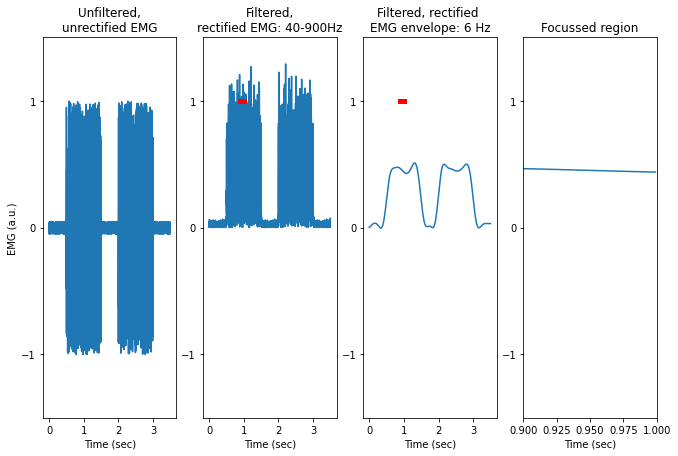

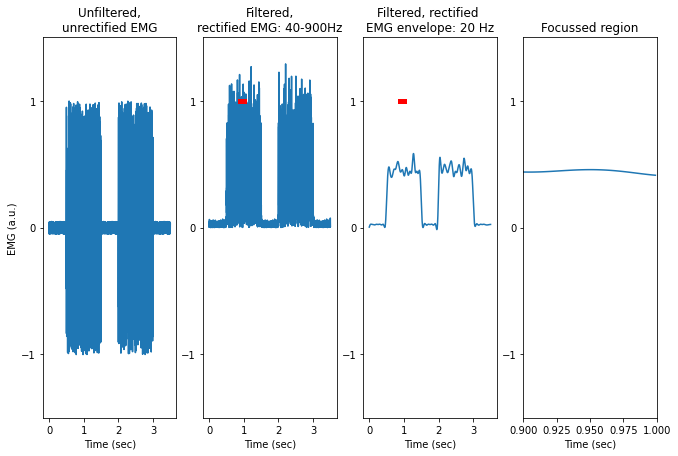

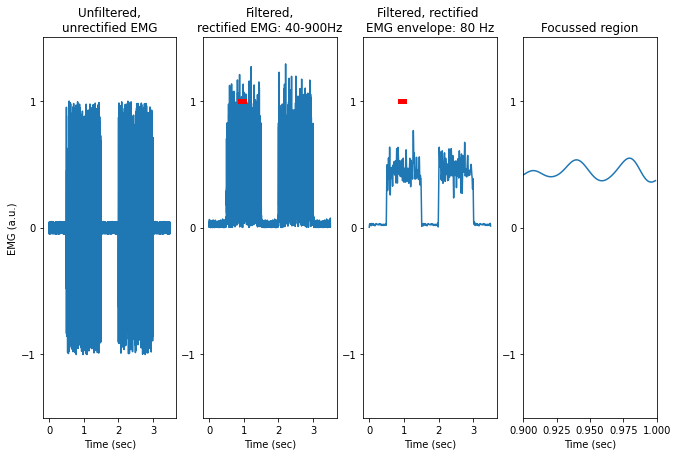

In [10]:
# simulate EMG signal
burst1 = np.random.uniform(-1, 1, size=1000) + 0.08
burst2 = np.random.uniform(-1, 1, size=1000) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08
emg = np.concatenate([quiet, burst1, quiet, burst2, quiet])
time = np.array([i/1000 for i in range(0, len(emg), 1)]) # sampling rate 1000 Hz

# # plot EMG signal
# fig = plt.figure()
# plt.plot(time, emg)
# plt.xlabel('Time (sec)')
# plt.ylabel('EMG (a.u.)')

emg_correctmean = emg - np.mean(emg)

def filteremg(time, emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(time[int(0.9*1000):int(1.0*1000)], emg_envelope[int(0.9*1000):int(1.0*1000)])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlim(0.9, 1.0)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [3, 10, 40]:
    filteremg(time, emg_correctmean, low_pass=i)

Recognition based on https://www.kaggle.com/akshita72/hand-gesture-recognition-from-emg-signals.

Mb if data provides classes –– just train a classifier.

## Version 1.0

Downloading EMG dataset: 

Currently based on pipeline from https://www.theseus.fi/bitstream/handle/10024/147196/thesis_susan.pdf?sequence=1&isAllowed=y.

Rough outline:

**EMG data -> Moving average filter -> Savitzky-Golay Filter -> Classification algorithm**